# Lesson 13 - Plotting with Matplotlib

### The following topics are discussed in this notebook:
* Scatter plots
* Line plots
* Bar charts

Matplotlib is a package for creating data visualizations. It provides tools for creating a wide range of plots, and allows for a high level of customization. 

Python has two distint interfaces than can be used to generate plots. We will primarily by working with the `pyplot` API (Application Programming Interface). By convention, this is typically imported under the alias `plt`, as in the cell below.

In [1]:
import matplotlib.pyplot as plt

## Import Gapminder Data 

For most of the examples in this lesson, we will be working with the Gapminder dataset. This dataset contains socioeconomic data for 142 countries, collected once every five years during the period from 1952 to 2007. Each record within the dataset contains the following peices of information: **country**, **continent**, **year**, **population**, **life expectency**, **per capita GDP**. 

The cell below imports the dataset from a comma-separated file, and then creates 5 lists to contain the data from 2007. The names of the lists are `countries`, `continents`, `pop`, `lifeexp`, and `pcgdp`. This cell makes use of the `pandas` package, which we will discuss in a later lesson.


In [3]:
import pandas as pd
df = pd.read_csv('data/gapminder.csv')
countries = list(df.loc[df.year == 2007, 'country'])
continents = list(df.loc[df.year == 2007, 'continent'])
pop = list(df.loc[df.year == 2007, 'pop'].astype(int))
lifeexp = list(df.loc[df.year == 2007, 'lifeExp'])
pcgdp = list(df.loc[df.year == 2007, 'gdpPercap'])

The following cell prints the information for a randomly selected country. We can explore this dataset by running this cell a few times.

In [6]:
import random

n = random.choice(range(len(countries)))

print('Country Name:', countries[n])
print('Continent:   ', continents[n])
print('Population:  ', pop[n])
print('Life Exp:    ', lifeexp[n])
print('Per Cap GDP: ', pcgdp[n])  

Country Name: Jamaica
Continent:    Americas
Population:   2780132
Life Exp:     72.567
Per Cap GDP:  7320.880262000001


## Scatter Plots

Matplotlib contains a function called `scatter()` that can be used to generate scatter plots. This function has two required parameters named `x` and `y`. These parameters are expected to be lists containing the x and y coordinates of the plots to be pointed. 

Plots in Matplotlib are built up as a series of layers. We create a base plot, and then we can add additional plots on top of that, or add things like titles or axis labels. When we are done creating our plot, we can display it using `plt.show()`.

The cell below creates a simple scatter plot of life expectency against per capita GDP.

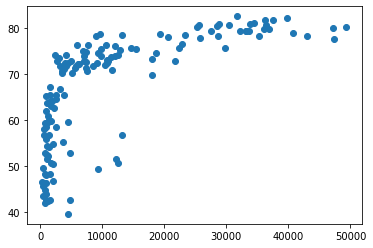

In [7]:
plt.scatter(x=pcgdp, y=lifeexp)
plt.show()

## Axis Labels and Title

We can use the `xlabel()`, `ylabel()`, and `title()` functions to add labels to the axes, or a title to the plot. 

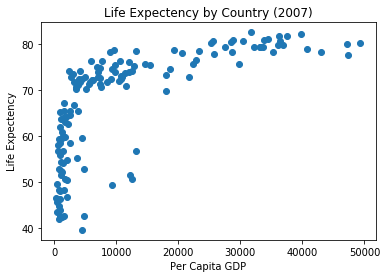

In [8]:
plt.scatter(x=pcgdp, y=lifeexp)
plt.xlabel('Per Capita GDP')
plt.ylabel('Life Expectency')
plt.title('Life Expectency by Country (2007)')
plt.show()

## Changing the Figure Size

We can use the `figure()` function to change the size of our plot. 

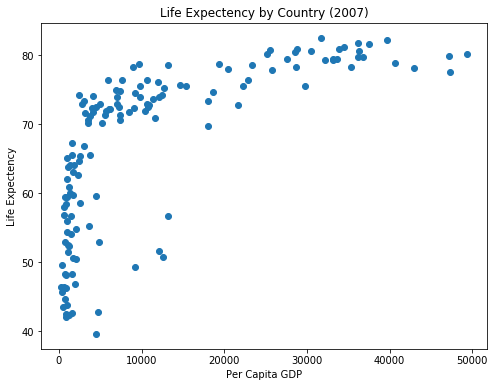

In [9]:
plt.figure(figsize=[8,6])
plt.scatter(x=pcgdp, y=lifeexp)
plt.xlabel('Per Capita GDP')
plt.ylabel('Life Expectency')
plt.title('Life Expectency by Country (2007)')
plt.show()

## Setting Point Properties

There are several optional parameters that we can provide to `scatter()` to control the way that points are displayed. A few common examples are:

* **`s`** - Controls the size of the points. 
* **`color`** - Sets the fill color of the points. 
* **`edgecolor`** - Sets the border color of the points.
* **`alpha`** - Controls the opacity of the points. 

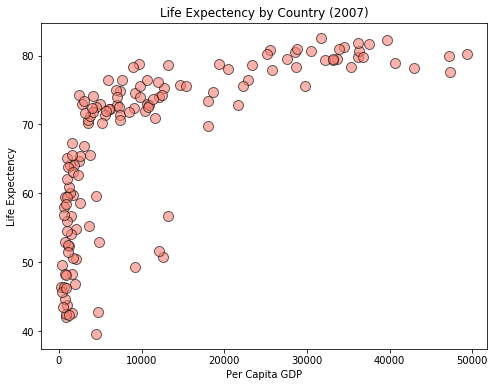

In [10]:
plt.figure(figsize=[8,6])
plt.scatter(x=pcgdp, y=lifeexp, s=100, alpha=0.6, 
            color='salmon', edgecolor='k')
plt.xlabel('Per Capita GDP')
plt.ylabel('Life Expectency')
plt.title('Life Expectency by Country (2007)')
plt.show()

## Results by Continent

In the next few examples, we will group together countries by their continents. So that we can work with each continent separately, we will create 10 new lists. For each continent, we will create a list containing the per capita GDP for countries in that continent, as well as a list containing the life expectencies for countries in that continent. 

We will use list comprehensions for this task, but the same results could have been obtained with loops.

In [11]:
africa_pcgdp = [pcgdp[i] for i in range(len(countries)) 
                if continents[i] == 'Africa']
africa_lifeexp = [lifeexp[i] for i in range(len(countries)) 
                  if continents[i] == 'Africa']

americas_pcgdp = [pcgdp[i] for i in range(len(countries)) if continents[i] == 'Americas']
americas_lifeexp = [lifeexp[i] for i in range(len(countries)) if continents[i] == 'Americas']

asia_pcgdp = [pcgdp[i] for i in range(len(countries)) if continents[i] == 'Asia']
asia_lifeexp = [lifeexp[i] for i in range(len(countries)) if continents[i] == 'Asia']

europe_pcgdp = [pcgdp[i] for i in range(len(countries)) if continents[i] == 'Europe']
europe_lifeexp = [lifeexp[i] for i in range(len(countries)) if continents[i] == 'Europe']

oceania_pcgdp = [pcgdp[i] for i in range(len(countries)) if continents[i] == 'Oceania']
oceania_lifeexp = [lifeexp[i] for i in range(len(countries)) if continents[i] == 'Oceania']

## Plotting Multiple Sets of Points

We can used multiple `scatter()` functions to plot several different point sets within the same plot. In the plot below, we add the countries to the plot one continent at a time, and will color the points based on the continents. We also add a legend to the plot.

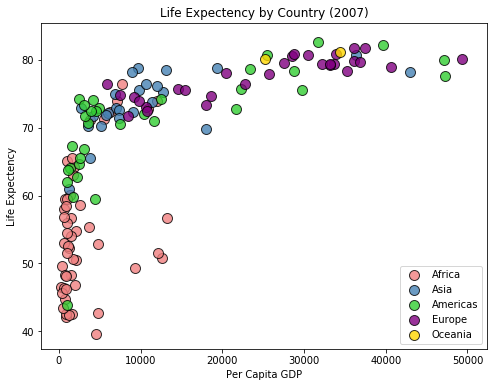

In [14]:
ps = 100
alpha = 0.8
plt.figure(figsize=[8,6])

plt.scatter(x=africa_pcgdp, y=africa_lifeexp, s=ps, alpha=alpha,
            color='lightcoral', edgecolor='k', label='Africa')

plt.scatter(x=americas_pcgdp, y=americas_lifeexp, s=ps, alpha=alpha,
            color='steelblue', edgecolor='k', label='Asia')

plt.scatter(x=asia_pcgdp, y=asia_lifeexp, s=ps, alpha=alpha,
            color='limegreen', edgecolor='k', label='Americas')

plt.scatter(x=europe_pcgdp, y=europe_lifeexp, s=ps, alpha=alpha,
            color='purple', edgecolor='k', label='Europe')

plt.scatter(x=oceania_pcgdp, y=oceania_lifeexp, s=ps, alpha=alpha,
            color='gold', edgecolor='k', label='Oceania')

plt.xlabel('Per Capita GDP')
plt.ylabel('Life Expectency')
plt.title('Life Expectency by Country (2007)')
plt.legend()
plt.show()

## Variable Point Size

We can allow the points in a scatter plot to have varying sizes by setting the `s` parameter to be a list of point sizes, rather than a single integer. This example is illustrated below. 

In [15]:
africa_pop = [pop[i]/200000 for i in range(len(countries)) if continents[i] == 'Africa']
americas_pop = [pop[i]/200000 for i in range(len(countries)) if continents[i] == 'Americas']
asia_pop = [pop[i]/200000 for i in range(len(countries)) if continents[i] == 'Asia']
europe_pop = [pop[i]/200000 for i in range(len(countries)) if continents[i] == 'Europe']
oceania_pop = [pop[i]/200000 for i in range(len(countries)) if continents[i] == 'Oceania']

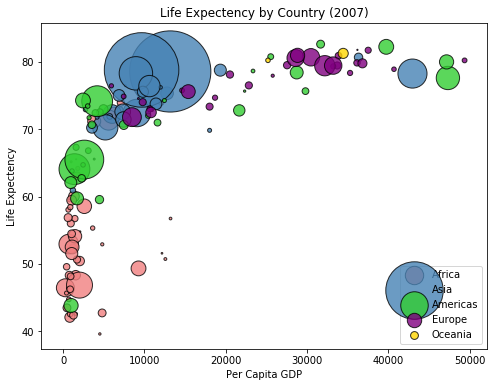

In [16]:
alpha = 0.8
plt.figure(figsize=[8,6])

plt.scatter(x=africa_pcgdp, y=africa_lifeexp, s=africa_pop, alpha=alpha,
            color='lightcoral', edgecolor='k', label='Africa')

plt.scatter(x=americas_pcgdp, y=americas_lifeexp, s=asia_pop, alpha=alpha,
            color='steelblue', edgecolor='k', label='Asia')

plt.scatter(x=asia_pcgdp, y=asia_lifeexp, s=americas_pop, alpha=alpha,
            color='limegreen', edgecolor='k', label='Americas')

plt.scatter(x=europe_pcgdp, y=europe_lifeexp, s=europe_pop, alpha=alpha,
            color='purple', edgecolor='k', label='Europe')

plt.scatter(x=oceania_pcgdp, y=oceania_lifeexp, s=oceania_pop, alpha=alpha,
            color='gold', edgecolor='k', label='Oceania')

plt.xlabel('Per Capita GDP')
plt.ylabel('Life Expectency')
plt.title('Life Expectency by Country (2007)')
plt.legend(loc='best')
plt.show()

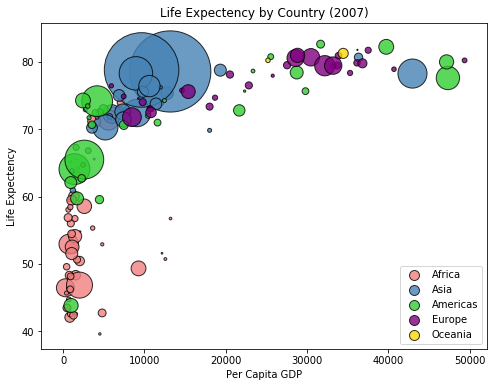

In [17]:
ps = 100
alpha = 0.8
plt.figure(figsize=[8,6])

plt.scatter(x=africa_pcgdp, y=africa_lifeexp, s=africa_pop, alpha=alpha,
            color='lightcoral', edgecolor='k', label='Africa')

plt.scatter(x=americas_pcgdp, y=americas_lifeexp, s=asia_pop, alpha=alpha,
            color='steelblue', edgecolor='k', label='Asia')

plt.scatter(x=asia_pcgdp, y=asia_lifeexp, s=americas_pop, alpha=alpha,
            color='limegreen', edgecolor='k', label='Americas')

plt.scatter(x=europe_pcgdp, y=europe_lifeexp, s=europe_pop, alpha=alpha,
            color='purple', edgecolor='k', label='Europe')

plt.scatter(x=oceania_pcgdp, y=oceania_lifeexp, s=oceania_pop, alpha=alpha,
            color='gold', edgecolor='k', label='Oceania')

plt.xlabel('Per Capita GDP')
plt.ylabel('Life Expectency')
plt.title('Life Expectency by Country (2007)')
lgnd = plt.legend(loc='best')

for lgnd_item in lgnd.legendHandles:
    lgnd_item._sizes = [100]

plt.show()

## Line Plots

We can use the `plot()` function in Matplotlib to create simple line plots. We will illustrate the use of this function by creating plots illustration the percentage growth in the populations of several countries over the last decade. The cell below creates lists containing our data. 

In [18]:
years = list(range(2009, 2019))
China = [0.49, 0.48, 0.48, 0.5, 0.49, 0.52, 0.5, 0.59, 0.53, 0.38]
Germany = [-0.27, -0.24, -0.53, 0.14, 0.24, 0.31, 0.53, 1.21, 0.41, 0.4]
Greece = [0.27, 0.27, 0, -0.27, -0.81, -0.64, -0.64, -0.74, -0.09, -0.28]
India = [1.39, 1.7, 2.07, 0.23, 0.84, 1.25, 1.22, 1.19, 1.15, 1.12]
Japan = [-0.14, 0.43, -0.2, -0.22, -0.17, -0.17, 0.02, -0.13, -0.17, -0.36]
United_States = [0.88, 0.83, 0.73, 0.73, 0.7, 0.74, 0.74, 0.73, 0.64, 0.62]

In the cell below, we plot the data for China.

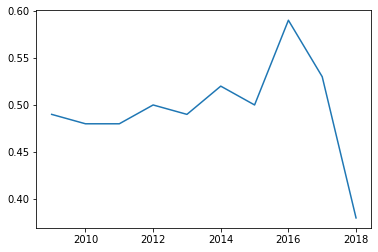

In [19]:
plt.plot(years, China)
plt.show()

## Line Plot Parameters

We can use the `ls` parameter to specify a linestyle for the plot. We can use `lw` to specify the line width. As with `scatter()`, the paramter `color` can be used to select a color.

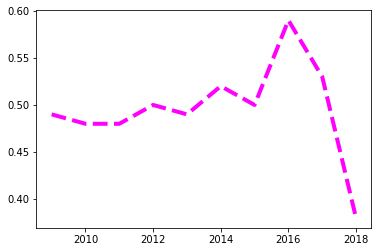

In [25]:
plt.plot(years, China, lw=4, ls='--', color='magenta')
plt.show()

If we are adding multiple plots to a figure and don't specify the colors, Matplotlib will select colors for us. 

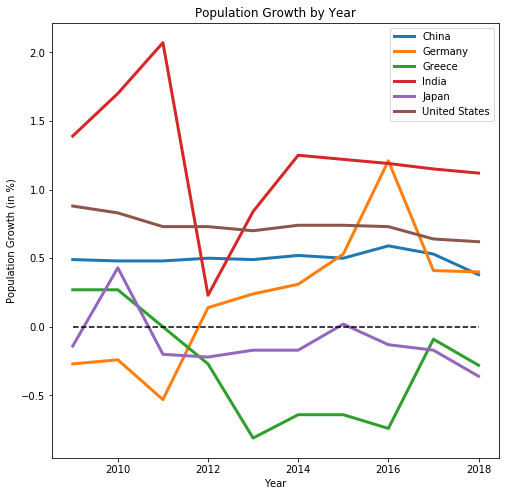

In [26]:
plt.figure(figsize=[8,8])
plt.plot(years, China, lw=3, label='China')
plt.plot(years, Germany, lw=3, label='Germany')
plt.plot(years, Greece, lw=3, label='Greece')
plt.plot(years, India, lw=3, label='India')
plt.plot(years, Japan, lw=3, label='Japan')
plt.plot(years, United_States, lw=3, label='United States')
plt.plot([2009, 2018], [0,0], ls='--', color='k')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population Growth (in %)')
plt.title('Population Growth by Year')
plt.show()

## Bar Charts

We can use the `bar()` function to create bar charts in Matplotlib. When creating a bar chart, we must use a range to specify the number of bars to use, and we also provide a list containing the heights of the bars. We can then use `xticks` to provide descriptive labels for each of the bars. We can use the `color` and `edgecolor` parameters to set the fill and border colors of the bars. 

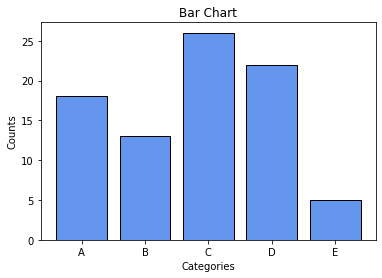

In [29]:
labels = ['A', 'B', 'C', 'D', 'E']
heights = [18, 13, 26, 22, 5]

plt.bar(labels, heights, color='cornflowerblue', edgecolor='k')
#plt.xticks(range(5), labels)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')
plt.show()

## Proportional Bar Charts

In the example below, we create a bar chart that represents proprotions, rather than counts. 

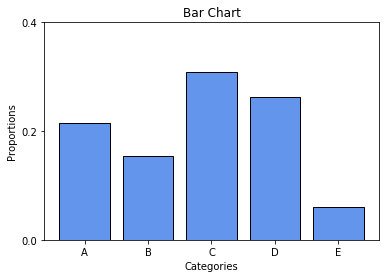

In [32]:
total = sum(heights)
props = []
for h in heights:
    props.append(h / total)

plt.bar(labels, props, color='cornflowerblue', edgecolor='k')
#plt.xticks(range(5), labels)
plt.xlabel('Categories')
plt.ylim([0, 0.4])
plt.yticks([0, 0.2, 0.4])
plt.ylabel('Proportions')
plt.title('Bar Chart')
plt.show()

## Stacked Bar Charts

Assume that we have a dataset in which the observations can be grouped together into categories according to two (or more) different categorical variables. Suppose we would like to know the distributions of one of these categorical variables within the groups defined by a seperate categorical variable. A stacked bar chart is a convenient visualization for representing this type of information. 

The example below shows an example of creating a stacked bar chart. 

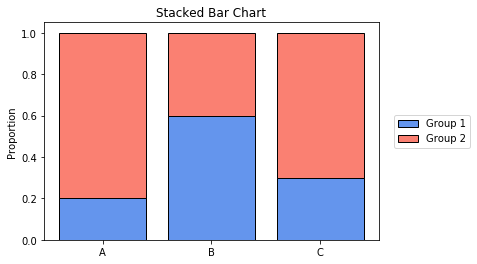

In [37]:
labels = ['A', 'B', 'C']

prop_1 = [0.2, 0.6, 0.3]
prop_2 = [0.8, 0.4, 0.7]

plt.bar(labels, prop_1, label='Group 1', color='cornflowerblue', 
        edgecolor='k')

plt.bar(labels, prop_2, label='Group 2', bottom=prop_1, color='Salmon', 
        edgecolor='k')

plt.legend(loc="center left", bbox_to_anchor=(1.03,0.5))
#plt.xticks(range(3), labels)
plt.ylabel('Proportion')
plt.title('Stacked Bar Chart')
plt.show()

**<font color="orangered" size="5">� Exercise</font>**

Create a stacked bar chart with one bar for each continent. The bars should be colored to show what proportion of countries within each continent have a life expectency of less than 70 years.

In [38]:
continent_list = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

prop_lifexp_under_70 = []
prop_lifexp_over_70 = []

for cont in continent_list:
       
    count_total = 0
    count_low_life_exp = 0
    
    for i in range(len(countries)):
        if continents[i] == cont:
            count_total += 1
            if lifeexp[i] < 70:
                count_low_life_exp += 1
                
    prop = count_low_life_exp / count_total

    prop_lifexp_under_70.append(prop)
    prop_lifexp_over_70.append(1 - prop)
    
print(prop_lifexp_under_70)
print(prop_lifexp_over_70)

[0.8653846153846154, 0.12, 0.3333333333333333, 0.0, 0.0]
[0.13461538461538458, 0.88, 0.6666666666666667, 1.0, 1.0]


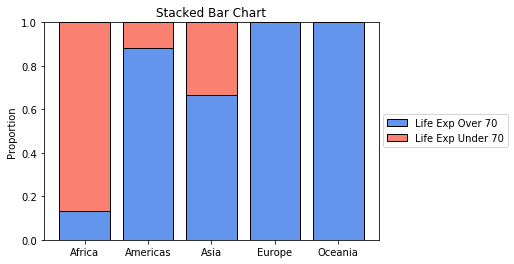

In [52]:
plt.bar(continent_list, prop_lifexp_over_70, label='Life Exp Over 70', 
        color='cornflowerblue', edgecolor='k')

plt.bar(continent_list, prop_lifexp_under_70, label='Life Exp Under 70', 
        bottom=prop_lifexp_over_70, color='Salmon', edgecolor='k')

plt.legend(bbox_to_anchor=(1.4,0.6))
plt.ylabel('Proportion')
plt.title('Stacked Bar Chart')
plt.show()